# Sistema de visão computacional

In [124]:
from skimage.io import imread, imshow, imsave
from skimage.color import rgb2gray
from skimage import data, filters
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_niblack
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


### 1. Pré-processamento

In [2]:
def crop_image(image):
    
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = rgb2gray(image)

    # Binariza a imagem
    thresh_mean = filters.threshold_mean(gray)
    binary_image = np.where(gray > thresh_mean, 255, 0).astype(np.uint8)
    
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    longest_contour = contours[0]
    longest_length = len(longest_contour)
    
    # Percorrer os contornos e encontrar o mais longo
    for contour in contours:
        length = len(contour)
        if length > longest_length:
            longest_contour = contour
            longest_length = length
            
    x, y, w, h = cv2.boundingRect(longest_contour)
    image = image[y:y+h, x:x+w]

    return image

In [10]:
# lista os arquivos do diretorio.
tumor_paths = glob.glob('imagens/*.jpg')
no_tumor_paths = glob.glob('imagens/*.jpg')


In [12]:
# Ler as imagens e faz o corte.
imgs_tumor = [imread(i) for i in tumor_paths]
imgs_tumor_crop = [crop_image(img) for img in imgs_tumor]


In [ ]:
imgs_no_tumor = [imread(i) for i in no_tumor_paths]
imgs_no_tumor_crop = [crop_image(img) for img in imgs_no_tumor]


In [3]:
def save_crop(imgs, path):
    
    for i in range(len(imgs)):
        imsave(path+str(i)+'.jpg', imgs[i])
    
    return 1


### Transformações de Intensidade

In [4]:
def Alargamento_de_contraste(image, k, E):
  return 1/(1 + (k/image)**E)

In [5]:
def negativo(image):
  return 255 - image

In [6]:
def logaritmica(image, c):
  return c * np.log(1 + image)

In [7]:
def potencia(image, gamma):
  return (image / 255) ** gamma * 255

In [8]:
def intensity_transformation(imgs, type):
    
    if type == 'al':
        imgs_it = [Alargamento_de_contraste(img, 5, 2) for img in imgs]
    
    elif type == 'neg':
        imgs_it = [negativo(img) for img in imgs]
    
    elif type == 'log':
        imgs_it = [logaritmica(img, 0.5) for img in imgs]
    
    elif type == 'po':
        imgs_it = [potencia(img, 3) for img in imgs]
    
    return imgs_it


In [13]:
images = glob.glob('dataset/testing/tumor/*.jpg')

images = [imread(img) for img in images]
images = [rgb2gray(img) for img in images]

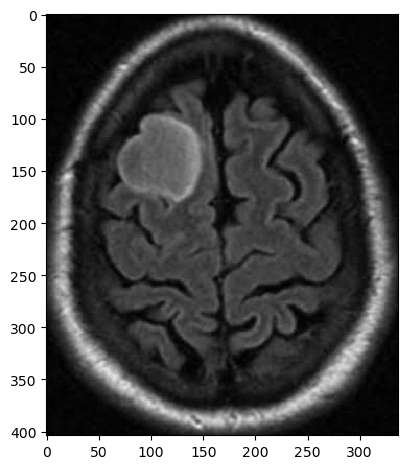

In [14]:
imshow(images[0])

In [61]:
images_ti = intensity_transformation(images, 'po')

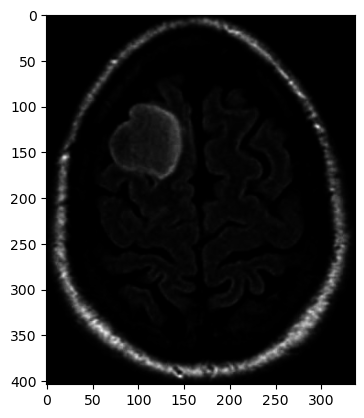

In [75]:
plt.imshow(images_ti[0], cmap='gray')

In [160]:
def kmeans_seg(img, k):
    kmeans = KMeans(n_clusters=k)
    img_train = img.reshape(-1, 1)
    result = kmeans.fit(img_train)
    
    labels = result.labels_
    cluster_centers = result.cluster_centers_
    
    cluster_centers = cluster_centers.reshape(1, -1)
    cluster_centers = list(cluster_centers[0])
    
    index_min = cluster_centers.index(min(cluster_centers))
    index_max = cluster_centers.index(max(cluster_centers))

    #print(labels)
    labels = ((labels != index_min) & (labels != index_max)).astype(np.uint8) * 225
    #labels = (labels != index_min)
    img_final = labels.reshape(img.shape)
    
    return img_final

[1 1 1 ... 1 1 1]


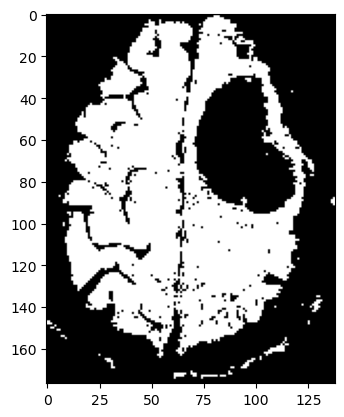

In [120]:
km = kmeans_seg(images[100], 3)

plt.imshow(km, cmap='gray')

In [157]:
gau_imgs = [filters.gaussian(img, sigma=1.5) for img in images]


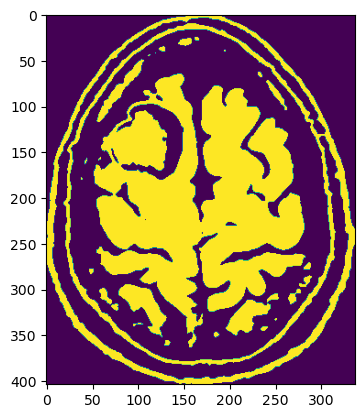

In [161]:
gau = kmeans_seg(gau_imgs[0], 3)

plt.imshow(gau)

numpy.ndarray